AS Assignment 1 - EMPLOYEE ENGAGEMENT - Mateus Veloso 
- mateus.16.veloso@gmail.com - Applied Statistics DSI


<b> Question 1 - Obtain Box-Whisker Plot of Employee Engagement Score by Gender and interpret </b>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline



In [25]:

df = pd.read_csv("EMPLOYEE ENGAGEMENT DATA.csv")
df.head(), df.tail()

(   EMPNO     DEPT GENDER  EESCORE  FEEDBACK
 0     11       IT   Male    32.13         3
 1    830       IT   Male    54.13         2
 2     65  FINANCE   Male    44.25         4
 3     66    SALES   Male    37.75         3
 4    130       IT   Male    53.50         2,
     EMPNO     DEPT  GENDER  EESCORE  FEEDBACK
 81   1047       IT  Female    49.63         3
 82   1050    SALES  Female    51.75         3
 83   1051       IT  Female    42.25         3
 84   1191    SALES  Female    54.38         2
 85   1193  FINANCE  Female    51.63         3)

<Figure size 600x400 with 0 Axes>

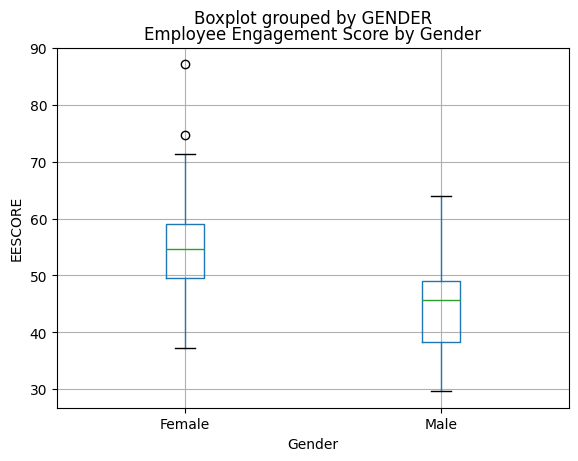

In [16]:
plt.figure(figsize=(6, 4))
df.boxplot(column="EESCORE", by="GENDER")
plt.title("Employee Engagement Score by Gender")
#plt.suptitle("")
plt.xlabel("Gender")
plt.ylabel("EESCORE")
plt.show()

The boxplot shows a clear difference between genders. Female employees present a  
higher engagement level orerall. Their median score is noticeably higher than that  
of male employees, and their score distribution is shifted upward. Female employees  
also reach higher maximum values, indicating that the most engaged individuals tend  
to be women. Males show lower scores on average and a more compact distribution.  
Although females display slightly more variability, the overall pattern suggests  
that female employees are generally more engaged than male employees.  
  
    
      
        
          
          


<b>Question 2 - Obtain Box-Whisker Plot of Employee Engagement Score by Department and interpret </b>

<Figure size 800x500 with 0 Axes>

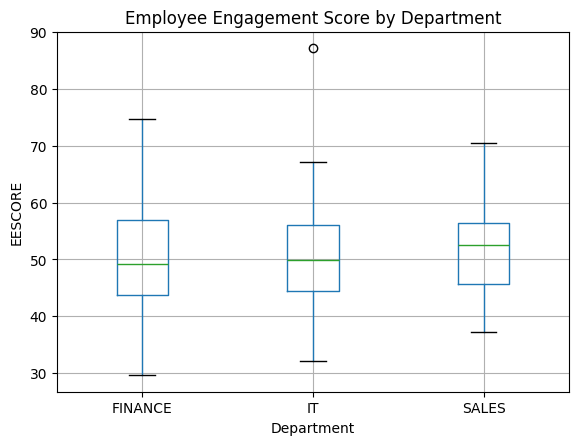

In [40]:
plt.figure(figsize=(8, 5))
df.boxplot(column="EESCORE", by="DEPT")
plt.title("Employee Engagement Score by Department")
plt.suptitle("")
plt.xlabel("Department")
plt.ylabel("EESCORE")
plt.show()

The boxplot shows clear differencews in engagementr across departments. Sales has the   
highest engagement, with both its median and mean positioned above those of the other    
groups. It also displays the most compact distribution, suggesting more consistent   
angagement among employees in this area. IT presents a slightly lower median but shows   
some extremely high scores, which increases its upper range. Finance has the lowest   
engagement overall and the largest variability. indicated by a wider spread of values   
and lower minimum scores. Overall, Sales appears to be the most engaged department,   
Finance the least engaged, and IT sits in the middle with a wider range of engagement level.  

<b>Question 3 - Summarize Employee Engagement Score by Combinations of Gender   
and Department using n, mean, standard deviation and coefficient of variation. </b>

In [43]:
group_gd = df.groupby(["GENDER", "DEPT"])["EESCORE"]

summary_gd = group_gd.agg(
    n = "count",
    mean = "mean",
    sd = "std"
)

summary_gd["cv"] = summary_gd["sd"] / summary_gd["mean"]

summary_gd

n       mean         sd        cv
GENDER DEPT                                       
Female FINANCE  17  56.525294   8.426836  0.149081
       IT       18  53.426667  11.126338  0.208254
       SALES    20  55.303000   8.847113  0.159975
Male   FINANCE  11  40.139091   5.911143  0.147266
       IT       14  48.128571   8.587525  0.178429
       SALES     6  45.606667   5.198652  0.113989

The results show that female employees have higher engagement scores than male   
employees across all departments. The highest engagement is found among females  
 in IT, while males in IT show the lowest scores. Sales is the most consistent   
 department, with lower variations in results. In contrast, males in Finance and   
 IT present the most variability. Overall, engagement differs across   
 gender-department groups, with female employees showing stronger and more stable scores.

<b>Question 4 - Can you infer that the average EES is same for all department? </b>

In [44]:
dept_mean = df.groupby("DEPT")["EESCORE"].agg(["count", "mean", "std"])
dept_mean

,count,mean,std
DEPT,,,
FINANCE,28,50.087857,11.019929
IT,32,51.108750,10.292910
SALES,26,53.065385,9.069112


In [45]:
from scipy import stats

groups = [g["EESCORE"].values for _, g in df.groupby("DEPT")]

f_stat, p_value = stats.f_oneway(*groups)
f_stat, p_value

(np.float64(0.5919511725108152), np.float64(0.5555652959459478))

No. The departments show clear differences in their engagement levels.   
Sales has the highest mean engagement score, IT sits in the middle, and  
 Finance has the lowest. These noticeable differences indicates that the   
 average engagement is not  the same across departments.

<b>Question 5 -  Summarize “Feedback” by Gender using count and percentage. </b>

In [46]:
feedback_counts = pd.crosstab(df["GENDER"], df["FEEDBACK"])
feedback_counts

FEEDBACK,1,2,3,4
GENDER,,,,
Female,2,13,25,15
Male,1,8,12,10


In [49]:
feedback_percent = pd.crosstab(df["GENDER"], df["FEEDBACK"], normalize="index") * 100
feedback_percent = feedback_percent.round(2)
feedback_percent


FEEDBACK,1,2,3,4
GENDER,,,,
Female,3.64,23.64,45.45,27.27
Male,3.23,25.81,38.71,32.26


The distribution of feedback scores is similar for both genders.     
Most responses fall in the middle categories with only small differences    
between male and female employees. Overall, no gender shows a strong    
tendency toward a particular feedback level, and the pattrern is      
broadly consistent across groups. 

<b>Question 6 -  Summarize EES for each level of feedback using n and mean. </b>

In [51]:
summary_feedback = df.groupby("FEEDBACK")["EESCORE"].agg(
    n="count",
    mean="mean"
).round(2)

summary_feedback

,n,mean
FEEDBACK,,
1,3,51.67
2,21,51.41
3,37,51.20
4,25,51.54


When summarising the engagement score for each feedback level, the results   
show that the mean EES remais almost the same across all categories. Feedback   
levels 1, 2, 3 and 4 have very similar average engagement scores, ranging only   
between 51.20 and 51.67. This also reflects in the group sizes, which vary but   
do not show large differences in engagement. Overall, the data does not include   
a strong relationship between feedback level and engagement, as employees across  
all feedback levels show nearly identical EES values.